In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ratings_Electronics.csv')
df.columns=['userId','productId','rating','timestamp']
df.drop(["timestamp"], axis=1, inplace=True)
display(df.head())
display(df.shape)

,userId,productId,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


(7824481, 3)

In [4]:
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")
    
print_memory_usage_of_data_frame(df)

Memory usage is 187.788 MB


In [5]:
#transformation of the data

counts = df['userId'].value_counts()
data_final = df[df['userId'].isin(counts[counts >= 50].index)]
data_final.shape

(125871, 3)

In [6]:
#i have made the dataset smaller compared to original one.

Plotting the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1D2160>]],
      dtype=object)

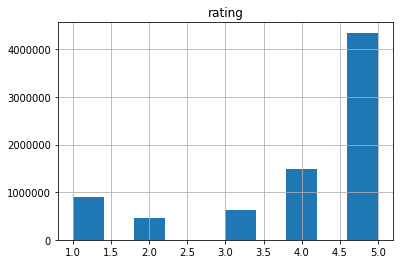

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df.hist()


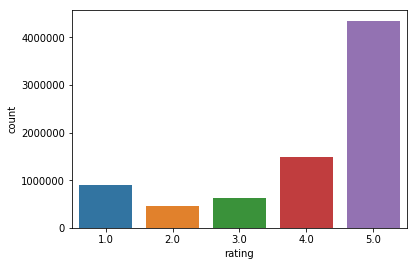

In [8]:
sns.countplot(df['rating'])

In [9]:
df.groupby('productId')['rating'].mean().head(20)

productId
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
0558835155    3.000000
059400232X    5.000000
0594012015    2.000000
0594017343    1.000000
0594017580    3.000000
0594033896    4.400000
0594033926    4.533333
0594033934    5.000000
0594202442    4.000000
0594287995    5.000000
0594296420    4.666667
0594450209    5.000000
0594450705    5.000000
0594451647    4.357143
0594477670    4.666667
0594478162    4.000000
Name: rating, dtype: float64

Splitting the data in train and test data

In [10]:
from sklearn.model_selection import train_test_split
counts = df['userId'].value_counts()
df_final = df[df['userId'].isin(counts[counts >=50].index)]
print('Number of users who have rated 50 or more items =', len(df_final))

('Number of users who have rated 50 or more items =', 125871)


In [11]:
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,rating
6595852,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738240,AB094YABX21WQ,B0056XCEAA,1.0
4175595,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753015,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734766,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [12]:
train_data.shape

(88109, 3)

In [13]:
test_data.shape

(37762, 3)

Popularity Recommendation System

In [14]:
df.groupby('productId')['rating'].mean().head()

productId
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
0558835155    3.000000
Name: rating, dtype: float64

In [7]:
df.groupby('productId')['rating'].mean().sort_values(ascending=False).head()

productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
Name: rating, dtype: float64

In [8]:
df.groupby('productId')['rating'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

In [0]:
mean_count=pd.DataFrame(df.groupby('productId')['rating'].mean())

In [0]:
mean_count['rating_count']=pd.DataFrame(df.groupby('productId')['rating'].count())

In [11]:
mean_count.head()

,rating,rating_count
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


Here we can evidently see that the product having the ID **0528881469** might have less rating but is more popular in this case. Popularity based recommendation system takes the data which is provided as it is we cannot say customise it according to us.

**Collaborative Filtering Model**

In [15]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df.describe()
#average is 4.01 and max value is 5

,rating
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head()

,rating
productId,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852


In [14]:
ratings['number_of_ratings'] = df.groupby('productId')['rating'].count()
ratings.head()

,rating,number_of_ratings
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


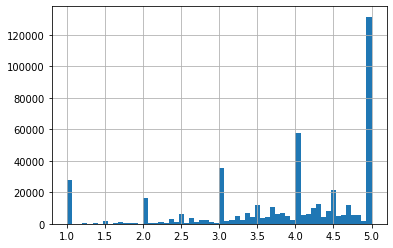

In [15]:
#now plot a Histogram using pandas plotting functionality to visualize the distribution of the ratings
ratings['rating'].hist(bins=60)

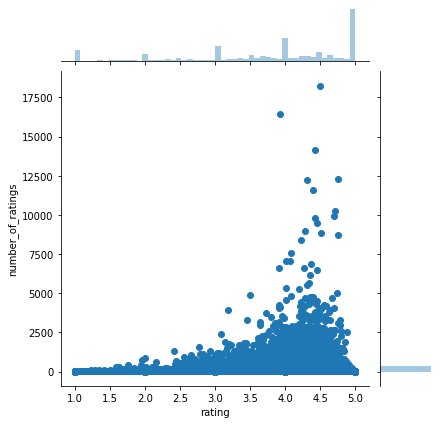

In [16]:
# check the relationship between the rating of a movie and the number of ratings. We do this by plotting a scatter plot using seaborn. Seaborn enables us to do this using the jointplot() function.
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [ ]:
#we can see that their is a positive relationship between the average rating of a movie and the number of ratings. 
#The graph indicates that the more the ratings a movie gets the higher the average rating it gets.


In [59]:
from surprise import KNNWithMeans
from surprise import Dataset
import os
from surprise import accuracy
from surprise import SVD
from surprise import Reader
from surprise.model_selection import train_test_split

In [26]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,userId,productId,rating
0,6595852,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738240,AB094YABX21WQ,B0056XCEAA,1.0
2,4175595,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753015,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734766,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [27]:
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
pivot_df.shape
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import numpy as np
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [29]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
#Will aply SVD

In [46]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [47]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [48]:
userId = 56
num_recommendations = 5
recommend_items(userId, pivot_df, preds_df, num_recommendations)
#So here we get top 5 recommendation for user 56


Below are the recommended items for user(user_id = 56):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          2.079630
B00829TIEK                  0.0          1.638359
B00829THK0                  0.0          1.439955
B008DWCRQW                  0.0          1.329265
B003ES5ZUU                  0.0          1.005836


In [49]:
# Average ACTUAL rating for each item
final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

('Shape of final_ratings_matrix: ', (1540, 48190))
('given_num_of_ratings = ', 125871)
('possible_num_of_ratings = ', 74212600)
density: 0.00%


In [50]:
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [52]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0594451647    0.001542
0594481813    0.002341
0970407998    0.002597
0972683275    0.011807
1400501466    0.004848
dtype: float64

In [53]:
#RMSE
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [54]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0033 



In [55]:
# Enter 'userID' and 'num_recommendations' for the user #so here we get 5 top recommendation
userID = 124
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 124):

                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.078143
B007WTAJTO                  0.0          0.062394
B007I5JT4S                  0.0          0.046486
B000JMJWV2                  0.0          0.043938
B000MX48VM                  0.0          0.043040


In [56]:
algo = KNNWithMeans(k=10 , sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train_data)

AttributeError: 'DataFrame' object has no attribute 'n_items'

In [57]:
test_pred_Item = algo.test(test_data)

ValueError: too many values to unpack

In [60]:
#SVD
algo = SVD()
algo.fit(train_data)
predictions = algo.test(test_data)

AttributeError: 'DataFrame' object has no attribute 'global_mean'

In [ ]:
def get_top_recommendation(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_recommendation(predictions, n=5)
top_n

unlike popularity based collaborative filtering is personalized based filtering and instead of suggesting same product to each user it is recommending list of different products to each user based on past experience¶